#Necessary libraries and packages

In [16]:
import tensorflow as tf

In [17]:
!pip install mediapipe

In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

 #Keypoints using MP Holistic

In [19]:
# 
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [20]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [21]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


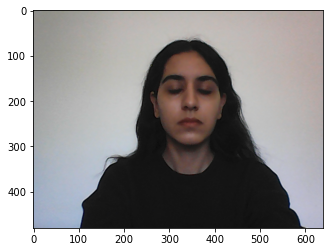

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#Extract Keypoint Values

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.71893024,  0.60778338, -1.32940769, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
  np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.71893024,  0.60778338, -1.32940769, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [28]:
os.getcwd()

'C:\\Users\\niloofar'

In [29]:
import os

# Path to the directory you want to check permissions for
directory_path = 'D:\\'

# Check if the current user has write permission for the directory
if os.access(directory_path, os.W_OK):
    print("Write permission is granted for:", directory_path)
else:
    print("Write permission is not granted for:", directory_path)

Write permission is granted for: D:\


In [30]:
import os

# Path to the directory you want to modify permissions for
directory_path = 'D:\\'
# Define the permissions you want to set (e.g., read, write, execute for owner, group, others)
# Here's an example of setting read and write permissions for owner, group, and others
permissions = 0o777  # octal representation of rwxrwxrwx

# Set the permissions
os.chmod(directory_path, permissions)


In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('D:\\','MyData') 

# Actions that we try to detect
actions = np.array(['Swipe', 'Zoomin', 'Zoomout','tap','rotate','clap'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [32]:
print(DATA_PATH)

D:\MyData


In [23]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('D:\\', 'MyData') 

# Actions that we try to detect
actions = np.array(['Swipe', 'Zoomin', 'Zoomout', 'tap', 'rotate', 'clap'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

print(DATA_PATH)

for action in actions: 
    try:
        os.makedirs(os.path.join(DATA_PATH, action))
    except FileExistsError:
        pass
    
    dirmax = 0
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except ValueError:
        pass
    except FileNotFoundError:
        pass
    
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except FileExistsError:
            pass


D:\MyData


In [20]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\MyData\\Swipe'

# Collect Keypoint Values for Training and Testing

In [24]:
# either run this or above

In [27]:
sequence_length

30

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1,no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [35]:
label_map

{'Swipe': 0, 'Zoomin': 1, 'Zoomout': 2, 'tap': 3, 'rotate': 4, 'clap': 5}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(1,no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(174, 30, 1662)

In [38]:
np.array(labels).shape

(174,)

In [39]:
X = np.array(sequences)

In [40]:
X.shape

(174, 30, 1662)

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,shuffle=True)

In [43]:
y_test.shape

(9, 6)

# Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200,restore_best_weights=True)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_11 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-tr

In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, MaxPooling1D

model = Sequential()

# LSTM layers with dropout
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Adding dropout after the first LSTM layer
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout after the second LSTM layer
model.add(BatchNormalization())

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout after the third LSTM layer
model.add(BatchNormalization())

# Dense layers with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout before the first dense layer
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout before the second dense layer
model.add(BatchNormalization())

model.add(Dense(6, activation='softmax'))



In [112]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [102]:
history = model.fit(X_train, y_train,validation_split=0.10, epochs=2000, callbacks=[es])

Epoch 1/2000
5/5 [==============================] - 13s 737ms/step - loss: 2.4256 - categorical_accuracy: 0.1824 - val_loss: 6.0066 - val_categorical_accuracy: 0.2353
Epoch 2/2000
5/5 [==============================] - 2s 369ms/step - loss: 2.2863 - categorical_accuracy: 0.1757 - val_loss: 46.3158 - val_categorical_accuracy: 0.2353
Epoch 3/2000
5/5 [==============================] - 2s 367ms/step - loss: 2.2582 - categorical_accuracy: 0.1689 - val_loss: 16.1894 - val_categorical_accuracy: 0.1765
Epoch 4/2000
5/5 [==============================] - 2s 364ms/step - loss: 2.4772 - categorical_accuracy: 0.1689 - val_loss: 11.5401 - val_categorical_accuracy: 0.2941
Epoch 5/2000
5/5 [==============================] - 2s 383ms/step - loss: 2.2720 - categorical_accuracy: 0.1959 - val_loss: 11.1031 - val_categorical_accuracy: 0.2353
Epoch 6/2000
5/5 [==============================] - 2s 363ms/step - loss: 2.2849 - categorical_accuracy: 0.1554 - val_loss: 2.2063 - val_categorical_accuracy: 0.2353

5/5 [==============================] - 2s 352ms/step - loss: 1.9842 - categorical_accuracy: 0.2095 - val_loss: 1.8145 - val_categorical_accuracy: 0.2353
Epoch 51/2000
5/5 [==============================] - 2s 348ms/step - loss: 1.9418 - categorical_accuracy: 0.2027 - val_loss: 1.8189 - val_categorical_accuracy: 0.2353
Epoch 52/2000
5/5 [==============================] - 2s 353ms/step - loss: 1.9008 - categorical_accuracy: 0.1959 - val_loss: 1.8230 - val_categorical_accuracy: 0.2353
Epoch 53/2000
5/5 [==============================] - 2s 356ms/step - loss: 1.7817 - categorical_accuracy: 0.2095 - val_loss: 1.8252 - val_categorical_accuracy: 0.2353
Epoch 54/2000
5/5 [==============================] - 2s 349ms/step - loss: 1.8625 - categorical_accuracy: 0.2027 - val_loss: 1.8266 - val_categorical_accuracy: 0.2353
Epoch 55/2000
5/5 [==============================] - 2s 352ms/step - loss: 1.8653 - categorical_accuracy: 0.2568 - val_loss: 1.8256 - val_categorical_accuracy: 0.2353
Epoch 56/200

Epoch 148/2000
5/5 [==============================] - 2s 357ms/step - loss: 1.5125 - categorical_accuracy: 0.3311 - val_loss: 1.8480 - val_categorical_accuracy: 0.1765
Epoch 149/2000
5/5 [==============================] - 2s 357ms/step - loss: 1.4749 - categorical_accuracy: 0.3378 - val_loss: 1.7645 - val_categorical_accuracy: 0.1765
Epoch 150/2000
5/5 [==============================] - 2s 351ms/step - loss: 1.5185 - categorical_accuracy: 0.3108 - val_loss: 1.7140 - val_categorical_accuracy: 0.2353
Epoch 151/2000
5/5 [==============================] - 2s 353ms/step - loss: 1.4955 - categorical_accuracy: 0.3378 - val_loss: 1.8141 - val_categorical_accuracy: 0.2941
Epoch 152/2000
5/5 [==============================] - 2s 354ms/step - loss: 1.4287 - categorical_accuracy: 0.3784 - val_loss: 1.8365 - val_categorical_accuracy: 0.2353
Epoch 153/2000
5/5 [==============================] - 2s 353ms/step - loss: 1.4020 - categorical_accuracy: 0.4122 - val_loss: 1.8313 - val_categorical_accuracy:

Epoch 197/2000
5/5 [==============================] - 2s 461ms/step - loss: 1.4691 - categorical_accuracy: 0.3311 - val_loss: 1.6125 - val_categorical_accuracy: 0.0588
Epoch 198/2000
5/5 [==============================] - 5s 1s/step - loss: 1.4305 - categorical_accuracy: 0.3446 - val_loss: 1.5203 - val_categorical_accuracy: 0.1765
Epoch 199/2000
5/5 [==============================] - 2s 486ms/step - loss: 1.4242 - categorical_accuracy: 0.3649 - val_loss: 1.6846 - val_categorical_accuracy: 0.1765
Epoch 200/2000
5/5 [==============================] - 2s 458ms/step - loss: 1.4437 - categorical_accuracy: 0.3784 - val_loss: 1.7581 - val_categorical_accuracy: 0.3529
Epoch 201/2000
5/5 [==============================] - 2s 370ms/step - loss: 1.4864 - categorical_accuracy: 0.3446 - val_loss: 1.6775 - val_categorical_accuracy: 0.2941
Epoch 202/2000
5/5 [==============================] - 2s 355ms/step - loss: 1.3913 - categorical_accuracy: 0.3716 - val_loss: 1.5699 - val_categorical_accuracy: 0.

Epoch 246/2000
5/5 [==============================] - 2s 372ms/step - loss: 1.3148 - categorical_accuracy: 0.4189 - val_loss: 1.5980 - val_categorical_accuracy: 0.4118
Epoch 247/2000
5/5 [==============================] - 2s 359ms/step - loss: 1.2870 - categorical_accuracy: 0.4189 - val_loss: 1.7116 - val_categorical_accuracy: 0.2941
Epoch 248/2000
5/5 [==============================] - 2s 366ms/step - loss: 1.3164 - categorical_accuracy: 0.4054 - val_loss: 1.7232 - val_categorical_accuracy: 0.2353
Epoch 249/2000
5/5 [==============================] - 2s 375ms/step - loss: 1.2923 - categorical_accuracy: 0.4392 - val_loss: 1.6665 - val_categorical_accuracy: 0.2353
Epoch 250/2000
5/5 [==============================] - 2s 383ms/step - loss: 1.3192 - categorical_accuracy: 0.4189 - val_loss: 1.4487 - val_categorical_accuracy: 0.2941
Epoch 251/2000
5/5 [==============================] - 2s 368ms/step - loss: 1.3014 - categorical_accuracy: 0.4122 - val_loss: 1.3738 - val_categorical_accuracy:

Epoch 295/2000
5/5 [==============================] - 2s 356ms/step - loss: 1.2628 - categorical_accuracy: 0.4527 - val_loss: 1.1747 - val_categorical_accuracy: 0.3529
Epoch 296/2000
5/5 [==============================] - 2s 369ms/step - loss: 1.2636 - categorical_accuracy: 0.3851 - val_loss: 1.3471 - val_categorical_accuracy: 0.2353
Epoch 297/2000
5/5 [==============================] - 2s 339ms/step - loss: 1.2617 - categorical_accuracy: 0.4122 - val_loss: 1.2135 - val_categorical_accuracy: 0.1765
Epoch 298/2000
5/5 [==============================] - 2s 357ms/step - loss: 1.2362 - categorical_accuracy: 0.4797 - val_loss: 1.8744 - val_categorical_accuracy: 0.2353
Epoch 299/2000
5/5 [==============================] - 2s 340ms/step - loss: 1.3501 - categorical_accuracy: 0.4054 - val_loss: 1.8414 - val_categorical_accuracy: 0.2353
Epoch 300/2000
5/5 [==============================] - 2s 336ms/step - loss: 1.3481 - categorical_accuracy: 0.4392 - val_loss: 2.2067 - val_categorical_accuracy:

Epoch 344/2000
5/5 [==============================] - 2s 353ms/step - loss: 1.2336 - categorical_accuracy: 0.4527 - val_loss: 1.6780 - val_categorical_accuracy: 0.3529
Epoch 345/2000
5/5 [==============================] - 2s 333ms/step - loss: 1.1763 - categorical_accuracy: 0.4392 - val_loss: 1.9845 - val_categorical_accuracy: 0.2353
Epoch 346/2000
5/5 [==============================] - 2s 348ms/step - loss: 1.2201 - categorical_accuracy: 0.4662 - val_loss: 1.9756 - val_categorical_accuracy: 0.2941
Epoch 347/2000
5/5 [==============================] - 2s 343ms/step - loss: 1.1838 - categorical_accuracy: 0.4595 - val_loss: 1.7943 - val_categorical_accuracy: 0.2941
Epoch 348/2000
5/5 [==============================] - 2s 348ms/step - loss: 1.2192 - categorical_accuracy: 0.4932 - val_loss: 0.9982 - val_categorical_accuracy: 0.4706
Epoch 349/2000
5/5 [==============================] - 2s 377ms/step - loss: 1.2433 - categorical_accuracy: 0.4662 - val_loss: 1.6748 - val_categorical_accuracy:

Epoch 393/2000
5/5 [==============================] - 2s 374ms/step - loss: 1.0966 - categorical_accuracy: 0.5608 - val_loss: 1.0138 - val_categorical_accuracy: 0.3529
Epoch 394/2000
5/5 [==============================] - 2s 373ms/step - loss: 1.1821 - categorical_accuracy: 0.5068 - val_loss: 1.7454 - val_categorical_accuracy: 0.1765
Epoch 395/2000
5/5 [==============================] - 2s 381ms/step - loss: 1.1727 - categorical_accuracy: 0.4324 - val_loss: 1.1267 - val_categorical_accuracy: 0.3529
Epoch 396/2000
5/5 [==============================] - 2s 383ms/step - loss: 1.1717 - categorical_accuracy: 0.5203 - val_loss: 0.9358 - val_categorical_accuracy: 0.4118
Epoch 397/2000
5/5 [==============================] - 2s 359ms/step - loss: 1.1245 - categorical_accuracy: 0.5135 - val_loss: 1.2316 - val_categorical_accuracy: 0.2941
Epoch 398/2000
5/5 [==============================] - 2s 359ms/step - loss: 1.1389 - categorical_accuracy: 0.5338 - val_loss: 1.2851 - val_categorical_accuracy:

Epoch 442/2000
5/5 [==============================] - 2s 383ms/step - loss: 1.0775 - categorical_accuracy: 0.5135 - val_loss: 1.4640 - val_categorical_accuracy: 0.2941
Epoch 443/2000
5/5 [==============================] - 2s 378ms/step - loss: 1.0819 - categorical_accuracy: 0.5270 - val_loss: 1.5440 - val_categorical_accuracy: 0.2353
Epoch 444/2000
5/5 [==============================] - 2s 370ms/step - loss: 0.9975 - categorical_accuracy: 0.5541 - val_loss: 1.6765 - val_categorical_accuracy: 0.4118
Epoch 445/2000
5/5 [==============================] - 2s 385ms/step - loss: 1.0472 - categorical_accuracy: 0.4865 - val_loss: 0.9799 - val_categorical_accuracy: 0.5882
Epoch 446/2000
5/5 [==============================] - 2s 379ms/step - loss: 1.0059 - categorical_accuracy: 0.5541 - val_loss: 1.2392 - val_categorical_accuracy: 0.2941
Epoch 447/2000
5/5 [==============================] - 2s 379ms/step - loss: 1.1162 - categorical_accuracy: 0.5338 - val_loss: 2.3310 - val_categorical_accuracy:

Epoch 491/2000
5/5 [==============================] - 2s 359ms/step - loss: 0.9934 - categorical_accuracy: 0.5608 - val_loss: 2.4445 - val_categorical_accuracy: 0.2353
Epoch 492/2000
5/5 [==============================] - 2s 354ms/step - loss: 0.9443 - categorical_accuracy: 0.5608 - val_loss: 1.6338 - val_categorical_accuracy: 0.2941
Epoch 493/2000
5/5 [==============================] - 2s 359ms/step - loss: 1.0373 - categorical_accuracy: 0.6014 - val_loss: 1.4609 - val_categorical_accuracy: 0.3529
Epoch 494/2000
5/5 [==============================] - 2s 358ms/step - loss: 0.9698 - categorical_accuracy: 0.5473 - val_loss: 1.7323 - val_categorical_accuracy: 0.2353
Epoch 495/2000
5/5 [==============================] - 2s 352ms/step - loss: 0.9216 - categorical_accuracy: 0.5676 - val_loss: 1.4639 - val_categorical_accuracy: 0.3529
Epoch 496/2000
5/5 [==============================] - 2s 352ms/step - loss: 1.0161 - categorical_accuracy: 0.5270 - val_loss: 1.5246 - val_categorical_accuracy:

Epoch 540/2000
5/5 [==============================] - 2s 342ms/step - loss: 0.8897 - categorical_accuracy: 0.5676 - val_loss: 2.5172 - val_categorical_accuracy: 0.2353
Epoch 541/2000
5/5 [==============================] - 2s 326ms/step - loss: 0.9029 - categorical_accuracy: 0.5811 - val_loss: 1.6221 - val_categorical_accuracy: 0.3529
Epoch 542/2000
5/5 [==============================] - 3s 566ms/step - loss: 0.8088 - categorical_accuracy: 0.6419 - val_loss: 1.4200 - val_categorical_accuracy: 0.2941
Epoch 543/2000
5/5 [==============================] - 2s 371ms/step - loss: 0.9369 - categorical_accuracy: 0.6081 - val_loss: 1.6239 - val_categorical_accuracy: 0.2941
Epoch 544/2000
5/5 [==============================] - 2s 347ms/step - loss: 0.9319 - categorical_accuracy: 0.5878 - val_loss: 1.4228 - val_categorical_accuracy: 0.3529
Epoch 545/2000
5/5 [==============================] - 2s 360ms/step - loss: 0.9383 - categorical_accuracy: 0.5811 - val_loss: 2.6835 - val_categorical_accuracy:

Epoch 589/2000
5/5 [==============================] - 3s 551ms/step - loss: 0.8405 - categorical_accuracy: 0.6216 - val_loss: 1.5461 - val_categorical_accuracy: 0.2941
Epoch 590/2000
5/5 [==============================] - 2s 355ms/step - loss: 0.7861 - categorical_accuracy: 0.6757 - val_loss: 1.6203 - val_categorical_accuracy: 0.2941
Epoch 591/2000
5/5 [==============================] - 2s 359ms/step - loss: 0.8354 - categorical_accuracy: 0.5946 - val_loss: 2.3685 - val_categorical_accuracy: 0.2353
Epoch 592/2000
5/5 [==============================] - 2s 349ms/step - loss: 0.7921 - categorical_accuracy: 0.7162 - val_loss: 2.7566 - val_categorical_accuracy: 0.2353
Epoch 593/2000
5/5 [==============================] - 2s 340ms/step - loss: 0.8124 - categorical_accuracy: 0.6149 - val_loss: 2.9728 - val_categorical_accuracy: 0.2353
Epoch 594/2000
5/5 [==============================] - 2s 345ms/step - loss: 0.8854 - categorical_accuracy: 0.6149 - val_loss: 3.1191 - val_categorical_accuracy:

Epoch 638/2000
5/5 [==============================] - 2s 357ms/step - loss: 0.7516 - categorical_accuracy: 0.6622 - val_loss: 2.1868 - val_categorical_accuracy: 0.2353
Epoch 639/2000
5/5 [==============================] - 2s 358ms/step - loss: 0.9107 - categorical_accuracy: 0.5878 - val_loss: 2.0588 - val_categorical_accuracy: 0.2353
Epoch 640/2000
5/5 [==============================] - 2s 353ms/step - loss: 0.8481 - categorical_accuracy: 0.6554 - val_loss: 2.1780 - val_categorical_accuracy: 0.2353
Epoch 641/2000
5/5 [==============================] - 2s 356ms/step - loss: 0.9574 - categorical_accuracy: 0.6216 - val_loss: 1.1766 - val_categorical_accuracy: 0.3529
Epoch 642/2000
5/5 [==============================] - 2s 355ms/step - loss: 0.8973 - categorical_accuracy: 0.5473 - val_loss: 1.8084 - val_categorical_accuracy: 0.2353
Epoch 643/2000
5/5 [==============================] - 2s 366ms/step - loss: 0.7947 - categorical_accuracy: 0.6419 - val_loss: 2.7393 - val_categorical_accuracy:

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30, 64)            442112    
                                                                 
 dropout_26 (Dropout)        (None, 30, 64)            0         
                                                                 
 batch_normalization_20 (Bat  (None, 30, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_23 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_27 (Dropout)        (None, 30, 128)           0         
                                                                 
 batch_normalization_21 (Bat  (None, 30, 128)          512       
 chNormalization)                                     

In [67]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

# Assuming input_shape=(30, 1662, 1) for the input data
input_shape = (30, 1662)

model2 = Sequential()

# Reshape input data to fit 3D convolutional layers
model2.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape))
model2.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
model2.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model2.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Flatten the output of the convolutional layers
model2.add(Flatten())

# Dense layers
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(actions.shape[0], activation='softmax'))

model2.summary()


ValueError: Input 0 of layer "conv3d_1" is incompatible with the layer: expected min_ndim=5, found ndim=3. Full shape received: (None, 30, 1662)

#  Make Predictions

In [103]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [104]:
actions[np.argmax(res[4])]

'Zoomout'

In [105]:
actions[np.argmax(y_test[4])]

'Swipe'

# Save Weights

In [106]:
model.save('action2.h5')

In [107]:
del model

In [113]:
model.load_weights('action2.h5')

# Evaluation using Confusion Matrix and Accuracy

In [114]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [115]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 986ms/step


In [119]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [117]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 1],
        [1, 0]],

       [[8, 0],
        [1, 0]],

       [[5, 2],
        [0, 2]],

       [[7, 0],
        [2, 0]],

       [[5, 1],
        [0, 3]]], dtype=int64)

IndexError: index 5 is out of bounds for axis 1 with size 5

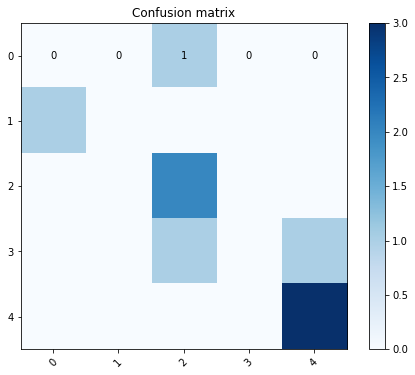

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true and y_pred are your true and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(ytrue, yhat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes = np.unique(np.concatenate((ytrue, yhat)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [120]:
accuracy_score(ytrue, yhat)

0.5555555555555556

#  Test in Real Time

In [121]:
from scipy import stats

In [122]:
colors = [(245,117,16), (117,245,16), (16,117,245),(200,100,5),(5,100,200),(200,5,100)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [123]:

plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [124]:
pip install Pillow

In [125]:
from PIL import ImageGrab

In [126]:
pip install pyautogui

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pyautogui
import time

# Get screen size
screen_width, screen_height = pyautogui.size()

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
            
            
        #3. Viz logic
        if np.unique(predictions[-10:])[0]==np.argmax(res): 
            if res[np.argmax(res)] > threshold: 

                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]
                # Viz probabilities
        image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


IndexError: index 0 is out of bounds for axis 0 with size 0

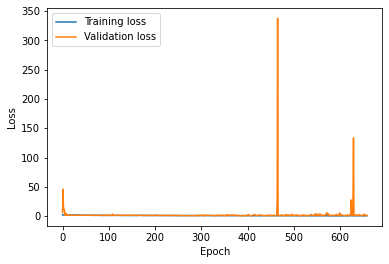

In [127]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
import pyautogui
import time

# Get screen size
screen_width, screen_height = pyautogui.size()

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            Task=actions[np.argmax(res)]
            print(Task)
            predictions.append(np.argmax(res))
            
            if Task == 'Swipe':
               # Move mouse to the center of the screen
                pyautogui.moveTo(screen_width // 2, screen_height // 2)
            
            elif Task == 'Zoomin':
                # Zoom in
                pyautogui.keyDown('ctrl')
                pyautogui.scroll(10)  # You can adjust the scrolling amount
                pyautogui.keyUp('ctrl')

            elif Task == 'Zoomout':
                # Zoom out
                pyautogui.keyDown('ctrl')
                pyautogui.scroll(-10)  # You can adjust the scrolling amount
                pyautogui.keyUp('ctrl')

            elif Task == 'tap':
                # Tap (click) at a specific location
                tap_x, tap_y = 100, 100  # Adjust the coordinates as needed
                pyautogui.click(tap_x, tap_y)

            elif Task == 'rotate':
                # Rotate
                pyautogui.keyDown('alt')
                pyautogui.press('left')  # Rotate left
                pyautogui.keyUp('alt')
             # clap
            else:
                # Take screen shot
                screenshot = ImageGrab.grab()
                # Save the screenshot
                screenshot.save("screenshot.png")
                # show the screenshot
                screenshot.show()

            # Pause for a moment before finishing
            time.sleep(2)

            # Reset screen 
            pyautogui.moveTo(screen_width // 2, screen_height // 2)
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                    # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [128]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 45ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
clap
<class 'medi

1/1 [==============================] - 0s 30ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
clap
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rotate
<class 'mediapipe.python.so

1/1 [==============================] - 0s 26ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Zoomout
<cla

rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===

1/1 [==============================] - 0s 38ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Swipe
<class 'mediapipe.pyth

1/1 [==============================] - 0s 26ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Zoomout
<class 'mediapip

1/1 [==============================] - 0s 27ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Swipe
<class 'mediapipe.pyth

1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Zoomout
<cla

1/1 [==============================] - 0s 30ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Zoomout
<cla

1/1 [==============================] - 0s 44ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
rotate
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
rotate
<class 'media

1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Zoomout
<cla

1/1 [==============================] - 0s 44ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Swipe
<class 'mediapipe.pyth

1/1 [==============================] - 0s 34ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Zoomout
<cla

1/1 [==============================] - 0s 38ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Zoomin
<clas

Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Swipe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===

1/1 [==============================] - 0s 28ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Zoomin
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Zoomout
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Zoomout
<class 